Number of Records = 58
First Year: 1960
Last Year: 2017


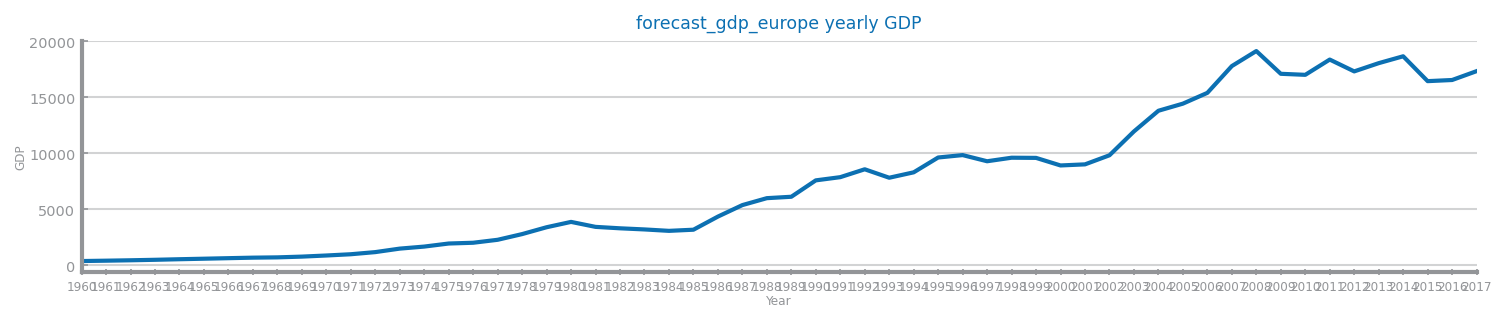

In [20]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# File details
file_tag = "forecast_gdp_europe"
target = "GDP"

# Load data
data: DataFrame = read_csv(
    "/Users/tomifemme/Desktop/DataScience/forecast_gdp_europe.csv",
    index_col="Year",  # Adjust to 'Year' if that's the correct column name
    sep=",",  # Comma-separated values
    decimal=".",  # Use period as decimal separator
    parse_dates=["Year"],  # Parse the 'Year' column as datetime
    infer_datetime_format=True,  # Automatically infer datetime format
)

# Extract target series
series: Series = data[target]

# Profiling output
print("Number of Records =", series.shape[0])
print("First Year:", series.index[0].year)
print("Last Year:", series.index[-1].year)

# Plot univariate time series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.year.to_list(),  # Use year values for the x-axis
    series.to_list(),  # GDP values
    xlabel="Year",  # Correct x-axis label
    ylabel=target,
    title=f"{file_tag} yearly {target}",  # Correct title to reflect yearly data
)
show()


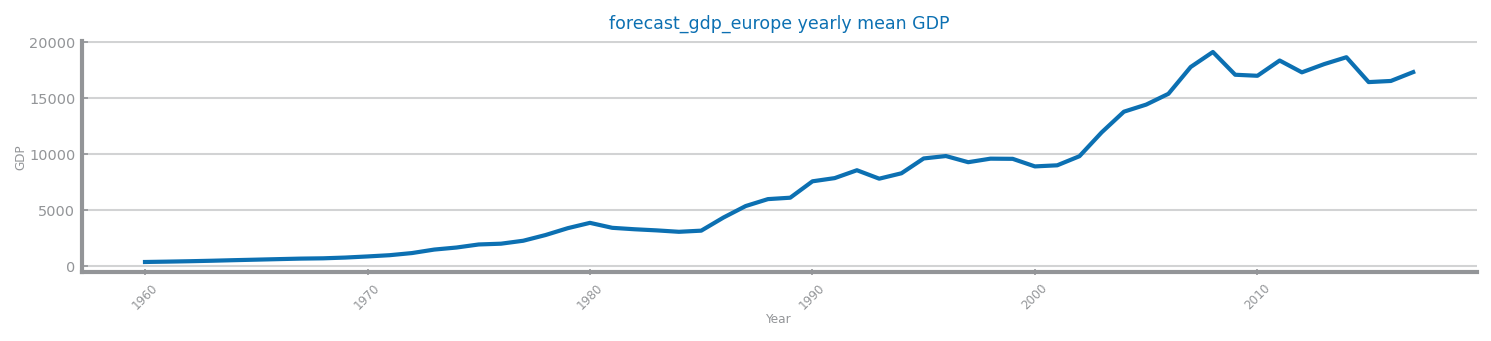

In [21]:
from pandas import Series, DataFrame, Index, Period
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT


# Define the aggregation function
from pandas import Series, DataFrame, Period, Index

# Define the aggregation function with explicit handling of periods
def ts_aggregation_by(
    data: Series | DataFrame,
    gran_level: str = "Y",  # Granularity level ('Y', '5Y', '10Y')
    agg_func: str = "mean",  # Aggregation function (e.g., mean)
) -> Series | DataFrame:
    df: Series | DataFrame = data.copy()

    # Convert the index to a Period index, with adjustments to align periods
    if gran_level == 'Y':
        # Yearly aggregation (no adjustment needed)
        index: Index[Period] = df.index.to_period('Y')
    elif gran_level == '5Y':
        # Adjust the period to 5-year intervals, starting from the earliest year
        index: Index[Period] = df.index.to_period('5Y')
    elif gran_level == '10Y':
        # Adjust the period to 10-year intervals, starting from the earliest year
        index: Index[Period] = df.index.to_period('10Y')
    else:
        raise ValueError(f"Unsupported granularity level: {gran_level}")

    # Group by the Period index and apply the aggregation function
    df = df.groupby(by=index, dropna=True, sort=True).agg(agg_func)

    # Convert the Period index back to a timestamp for plotting
    df.index = df.index.to_timestamp()

    return df




# Perform yearly aggregation on the 'GDP' series
ss_years: Series = ts_aggregation_by(series, "Y")

# Plot the yearly aggregated time series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_years.index.to_list(),
    ss_years.to_list(),
    xlabel="Year",
    ylabel=target,
    title=f"{file_tag} yearly mean {target}",
)
show()


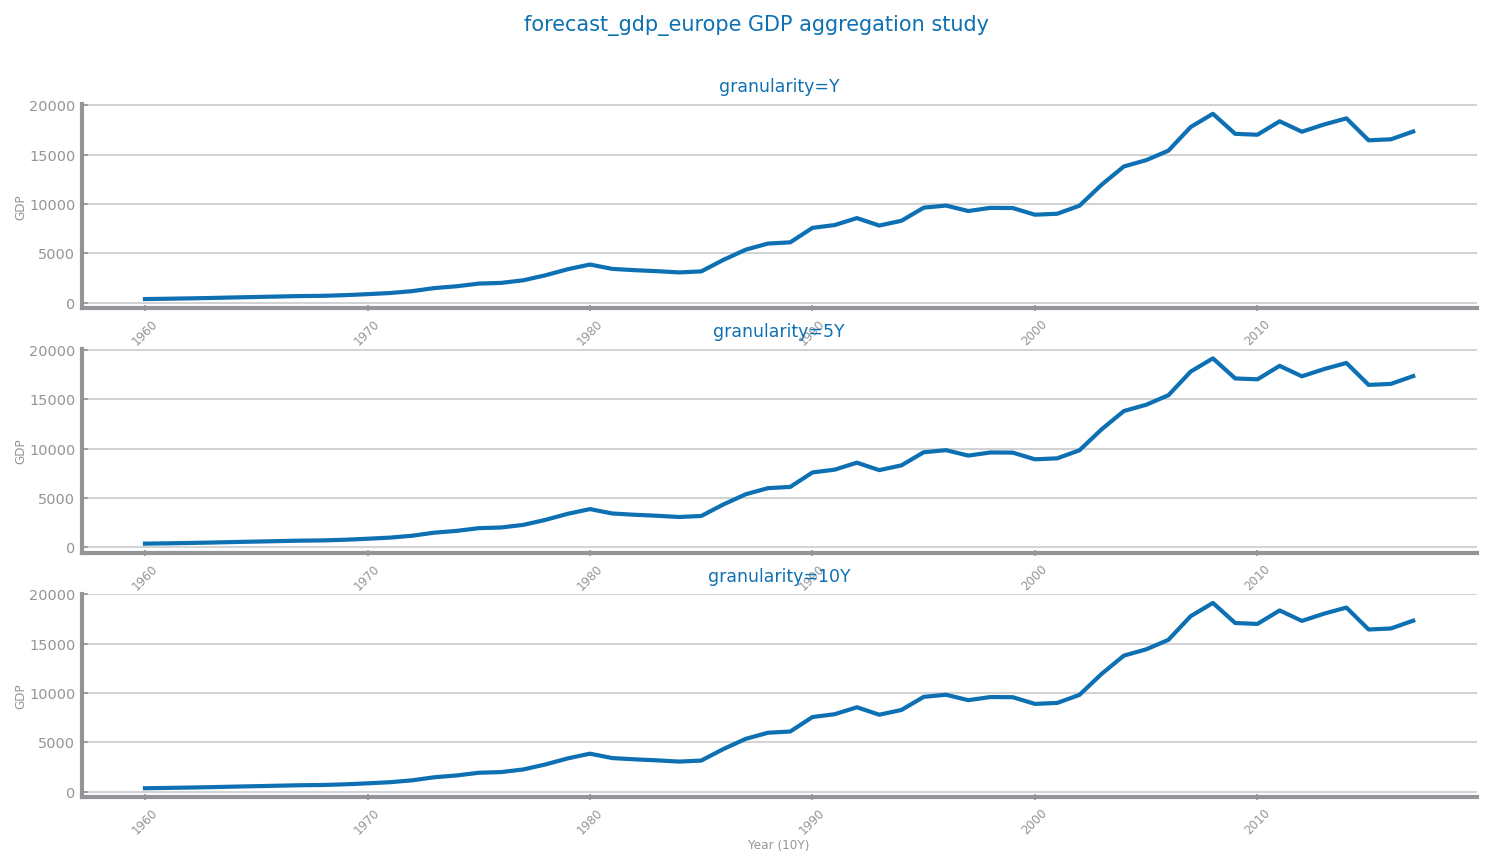

In [22]:
from matplotlib.pyplot import subplots, show
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from pandas import Series

# Define granularity levels to study
grans: list[str] = ["Y", "5Y", "10Y"]  # Yearly, 5-Year, 10-Year

# Create subplots for each granularity level
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(grans), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)))
fig.suptitle(f"{file_tag} {target} aggregation study")

# Loop through each granularity level
for i in range(len(grans)):
    # Aggregate the time series to the current granularity level
    ss: Series = ts_aggregation_by(series, grans[i])

    # Plot the aggregated time series on the respective subplot
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"Year ({grans[i]})",  # Label with granularity level
        ylabel=target,
        title=f"granularity={grans[i]}",  # Title for the subplot
    )

# Only display the plot once
show()


In [23]:
# Check aggregated data
for granularity in ["Y", "5Y", "10Y"]:
    aggregated_data = ts_aggregation_by(series, granularity)
    print(f"\nAggregated data for granularity {granularity}:")
    print(aggregated_data)



Aggregated data for granularity Y:
Year
1960-01-01      359.029
1961-01-01      390.887
1962-01-01      427.015
1963-01-01      470.415
1964-01-01      521.328
1965-01-01      567.732
1966-01-01      615.438
1967-01-01      661.332
1968-01-01      687.385
1969-01-01      754.985
1970-01-01      854.807
1971-01-01      966.895
1972-01-01     1157.617
1973-01-01     1469.889
1974-01-01     1652.067
1975-01-01     1925.962
1976-01-01     1994.811
1977-01-01     2259.061
1978-01-01     2768.458
1979-01-01     3381.002
1980-01-01     3859.035
1981-01-01     3414.524
1982-01-01     3286.231
1983-01-01     3185.259
1984-01-01     3058.274
1985-01-01     3160.727
1986-01-01     4333.946
1987-01-01     5362.160
1988-01-01     5981.271
1989-01-01     6107.077
1990-01-01     7573.007
1991-01-01     7859.432
1992-01-01     8563.868
1993-01-01     7808.204
1994-01-01     8291.509
1995-01-01     9617.733
1996-01-01     9832.903
1997-01-01     9281.645
1998-01-01     9598.123
1999-01-01     9583.143

In [24]:
for granularity in ["5Y", "10Y"]:
    aggregated_data = ts_aggregation_by(series, granularity)
    print(f"\nAggregated data for granularity {granularity}:")
    print(aggregated_data)


Aggregated data for granularity 5Y:
Year
1960-01-01      359.029
1961-01-01      390.887
1962-01-01      427.015
1963-01-01      470.415
1964-01-01      521.328
1965-01-01      567.732
1966-01-01      615.438
1967-01-01      661.332
1968-01-01      687.385
1969-01-01      754.985
1970-01-01      854.807
1971-01-01      966.895
1972-01-01     1157.617
1973-01-01     1469.889
1974-01-01     1652.067
1975-01-01     1925.962
1976-01-01     1994.811
1977-01-01     2259.061
1978-01-01     2768.458
1979-01-01     3381.002
1980-01-01     3859.035
1981-01-01     3414.524
1982-01-01     3286.231
1983-01-01     3185.259
1984-01-01     3058.274
1985-01-01     3160.727
1986-01-01     4333.946
1987-01-01     5362.160
1988-01-01     5981.271
1989-01-01     6107.077
1990-01-01     7573.007
1991-01-01     7859.432
1992-01-01     8563.868
1993-01-01     7808.204
1994-01-01     8291.509
1995-01-01     9617.733
1996-01-01     9832.903
1997-01-01     9281.645
1998-01-01     9598.123
1999-01-01     9583.14

In [25]:
# Loop through each granularity level and plot
for i in range(len(grans)):
    # Aggregate the time series to the current granularity level
    ss: Series = ts_aggregation_by(series, grans[i])

    # Print the aggregated data for debugging
    print(f"\nAggregated data for granularity {grans[i]}:")
    print(ss)

    # Plot the aggregated time series on the respective subplot
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"Year ({grans[i]})",  # Label with granularity level
        ylabel=target,
        title=f"granularity={grans[i]}",  # Title for the subplot
    )




Aggregated data for granularity Y:
Year
1960-01-01      359.029
1961-01-01      390.887
1962-01-01      427.015
1963-01-01      470.415
1964-01-01      521.328
1965-01-01      567.732
1966-01-01      615.438
1967-01-01      661.332
1968-01-01      687.385
1969-01-01      754.985
1970-01-01      854.807
1971-01-01      966.895
1972-01-01     1157.617
1973-01-01     1469.889
1974-01-01     1652.067
1975-01-01     1925.962
1976-01-01     1994.811
1977-01-01     2259.061
1978-01-01     2768.458
1979-01-01     3381.002
1980-01-01     3859.035
1981-01-01     3414.524
1982-01-01     3286.231
1983-01-01     3185.259
1984-01-01     3058.274
1985-01-01     3160.727
1986-01-01     4333.946
1987-01-01     5362.160
1988-01-01     5981.271
1989-01-01     6107.077
1990-01-01     7573.007
1991-01-01     7859.432
1992-01-01     8563.868
1993-01-01     7808.204
1994-01-01     8291.509
1995-01-01     9617.733
1996-01-01     9832.903
1997-01-01     9281.645
1998-01-01     9598.123
1999-01-01     9583.143

In [ ]:
# Loop through each granularity level and print aggregated data
for granularity in ["5Y", "10Y"]:
    # Aggregate the time series to the current granularity level
    ss: Series = ts_aggregation_by(series, granularity)
    
    # Print the aggregated data for debugging
    print(f"\nAggregated data for granularity {granularity}:")
    print(ss)
    
    # Plot the aggregated time series on the respective subplot
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"Year ({granularity})",  # Label with granularity level
        ylabel=target,
        title=f"granularity={granularity}",  # Title for the subplot
    )
